<a href="https://colab.research.google.com/github/zhaxylykbayeva/msis/blob/master/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [ ]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [ ]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Barkworth, Mr. Algernon Henry Wilson",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [ ]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [ ]:
titanic["Age"]=titanic["Age"].fillna(titanic["Age"].mean()).round(0)
titanic["Cabin"]=titanic.Cabin.fillna("other")
titanic["Embarked"]=titanic.Embarked.fillna(titanic["Embarked"].mode()[0])

titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [ ]:
titanic_sorted=titanic.sort_values(by='Fare', ascending=False)
titanic_sorted.iloc[15,]

PassengerId                   528
Survived                        0
Pclass                          1
Name           Farthing, Mr. John
Sex                          male
Age                            30
SibSp                           0
Parch                           0
Ticket                   PC 17483
Fare                      221.779
Cabin                         C95
Embarked                        S
Name: 527, dtype: object

### **Question 4: Out of all the females who survived, what's the name who has the 6th most expensive ticket?**

In [ ]:
#new df to filter out all the survived females
titanic_survivedfemales = titanic[(titanic["Survived"]== 1) & (titanic['Sex'] == "female")]

#sort by fare in descending order
titanic_survivedfemales.sort_values(by='Fare', ascending=False)

#locating 6th most expensive record
titanic_survivedfemales.iloc[5,]

PassengerId                                 11
Survived                                     1
Pclass                                       3
Name           Sandstrom, Miss. Marguerite Rut
Sex                                     female
Age                                          4
SibSp                                        1
Parch                                        1
Ticket                                 PP 9549
Fare                                      16.7
Cabin                                       G6
Embarked                                     S
Name: 10, dtype: object

### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [ ]:
table = titanic.pivot_table(values='Survived', index=['Pclass', 'Sex'], aggfunc=np.mean)
print(table)

               Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447


From the pivot table above, it is clear that overall women had much higher chances of survival, regardless of the class of their ticket.

For men, being in the 1st class more than doubled their chances of survival.

### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

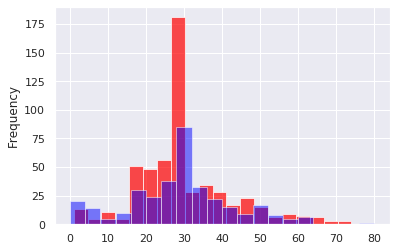

In [ ]:
notsurvived = titanic[(titanic["Survived"]==0)]
age=notsurvived["Age"]
age.plot.hist(bins=20, alpha = 0.7, color = "red")

survived = titanic[(titanic["Survived"]==1)]
age=survived["Age"]
age.plot.hist(bins=20, alpha=0.5, color = "blue")

Because the replaced values for age were mean of "Age" column (~30), it looks like there were far more 30 year-olds, which may or may not be true. Otherwise, distribution of survivors vs. non-survivors is fairly similar.

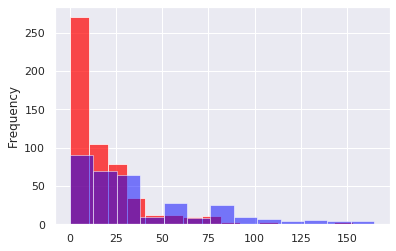

In [ ]:
fare=notsurvived["Fare"]
fare=fare[fare<200]
fare.plot.hist(bins=15, alpha = 0.7, color = "red")

fare=survived["Fare"]
fare=fare[fare<200]
fare.plot.hist(bins=13, alpha=0.5, color = "blue")

As for the fares, lower ticket price does correlate with higher mortality. Passengers who paid above $200 for their ticket mostly survived, hence I filtered them out to visualize relationship more clearly.

People who paid over $40 were also more likely to survive, whereas the less a passenger paid, the lower chances for survival they had.

### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

In [ ]:
newpivottable = titanic.pivot_table(values='Survived', index=['SibSp'], aggfunc=np.mean)
print(newpivottable)
newpivottable = titanic.pivot_table(values='Survived', index=['Parch'], aggfunc=np.mean)
print(newpivottable)


       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000


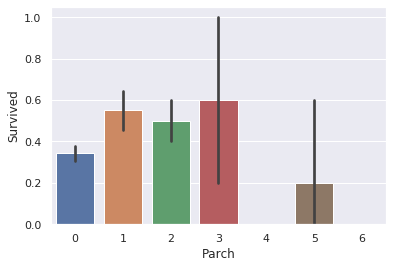

In [ ]:
barplotParch = sns.barplot(x="Parch", y="Survived", data=titanic)

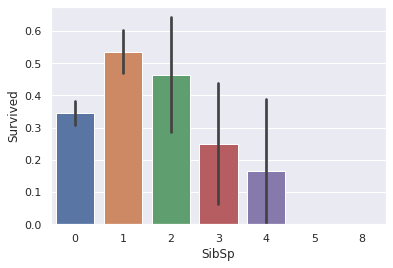

In [ ]:
barplotSibSp = sns.barplot(x="SibSp", y="Survived", data=titanic)

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

In [ ]:
#One-hot encoding gender column, in order to test correlation of female survival vs. male survival

titanic = pd.get_dummies(titanic, columns=['Sex'])

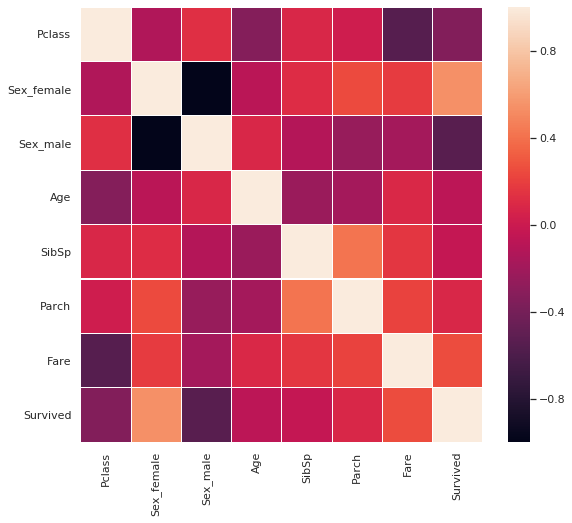

In [ ]:
df_x=titanic[["Pclass","Sex_female","Sex_male","Age","SibSp","Parch","Fare", "Survived"]]

corr_mat = df_x.corr()

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_mat, ax = ax, linewidths = 0.1) 

From the heat map above, gender and fare have shown correlation. While females were more likely to survive according to the analysis, males' survival was less likely. Paying higher fare has also showed correlation to survival.

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

In Question 7 above, I found it interesting that passengers with children on board were generally a little bit more likely to survive. As for Siblings and Spouses, chances of survival are pretty high for the passengers with values between 1 and 2, after which survival rate significantly drops for those with 3 siblings./spouses or more.

Overall, I did notice a strong relationship between ticket prices and survival from the multiple tests and visuals perfomed in this assignment.